In [83]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [104]:
df = pd.read_csv('dataset.csv')

In [105]:
df.head()

,state/ut,crime head,2018,2019,2020,2021
0,Andhra Pradesh,murder,935,870,853,956
1,ArunachalPradesh,murder,62,60,45,49
2,Assam,murder,1241,1235,1131,1192
3,Bihar,murder,2934,3138,3150,2799
4,Chhattisgarh,murder,917,913,972,1007


In [106]:
years_title = [str(i) for i in range(2018,2022)]

In [107]:
states = df['state/ut'].unique()
states=states[:-4]
states

array(['Andhra Pradesh', 'ArunachalPradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana'], dtype=object)

In [108]:
types_of_cases = df['crime head'].unique()
types_of_cases=types_of_cases[:-1]
types_of_cases

array(['murder', 'rape', 'assualt on women', 'kidnapping'], dtype=object)

In [ ]:
for state in states:
    fig=plt.figure(figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
    plt.title(state)
    plt.xlabel('Years')
    plt.ylabel("No of Cases")
    for case in types_of_cases:
        temp_df=df[(df['state/ut']==state) & (df['crime head']==case)]
        N_cases=[temp_df[c].values[0] for c in years_title]
        plt.plot(years_title,N_cases)
        plt.legend(types_of_cases)

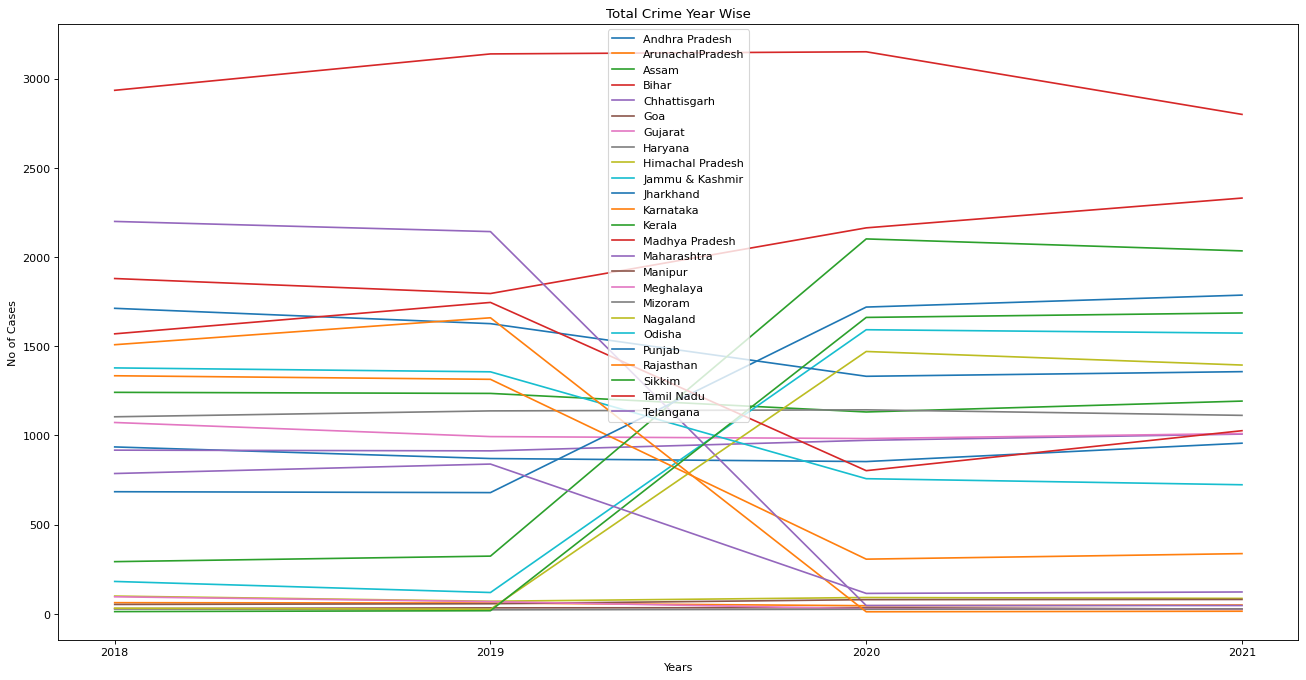

In [110]:
fig=plt.figure(figsize=(20,10),dpi=80,facecolor='w',edgecolor='k')
plt.title("Total Crime Year Wise")
plt.xlabel('Years')
plt.ylabel('No of Cases')
for state in states:
    temp_df=df[(df['state/ut']==state) & (df['crime head']=='murder')]
    N_cases=[temp_df[c].values[0] for c in years_title]
    plt.plot(years_title,N_cases)
    plt.legend(states)

In [111]:
print("Data set")
for col_name in df.columns:
    if df[col_name].dtypes=='object':
        unique_cat=len(df[col_name].unique())
        print("feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))
print()

Data set
feature 'state/ut' has 29 categories
feature 'crime head' has 5 categories



In [112]:
from sklearn import preprocessing
lab=preprocessing.LabelEncoder()

#df['state/ut']=lab.fit_transform(df['state/ut'])
df['crime head']=lab.fit_transform(df['crime head'])

df.head()

,state/ut,crime head,2018,2019,2020,2021
0,Andhra Pradesh,3,935,870,853,956
1,ArunachalPradesh,3,62,60,45,49
2,Assam,3,1241,1235,1131,1192
3,Bihar,3,2934,3138,3150,2799
4,Chhattisgarh,3,917,913,972,1007


In [113]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=9)
kmeans.fit(df.iloc[:,1:])


KMeans(n_clusters=9)

In [114]:
kmeans.cluster_centers_

array([[2.15789474e+00, 2.87385965e+02, 2.94578947e+02, 2.55649123e+02,
        2.84315789e+02],
       [2.00000000e+00, 1.71150000e+04, 1.68445000e+04, 1.38685000e+04,
        1.73150000e+04],
       [1.57894737e+00, 3.26189474e+03, 3.10121053e+03, 3.77821053e+03,
        4.58210526e+03],
       [2.00000000e+00, 2.33587500e+04, 2.49537500e+04, 1.99615000e+04,
        2.46412500e+04],
       [1.20000000e+00, 9.76640000e+03, 1.01536000e+04, 7.64740000e+03,
        9.52120000e+03],
       [2.19565217e+00, 1.28506522e+03, 1.26456522e+03, 1.47343478e+03,
        1.55208696e+03],
       [1.57142857e+00, 4.46057143e+03, 5.11028571e+03, 2.19000000e+02,
        2.39714286e+02],
       [1.50000000e+00, 6.28625000e+03, 6.38325000e+03, 6.77700000e+03,
        7.22875000e+03],
       [1.00000000e+00, 2.17110000e+04, 2.09890000e+04, 1.29130000e+04,
        1.45540000e+04]])

In [115]:
labels=kmeans.labels_
labels

array([5, 0, 5, 2, 5, 0, 5, 5, 0, 5, 5, 0, 5, 5, 5, 0, 0, 0, 0, 5, 5, 0,
       5, 5, 0, 5, 6, 0, 5, 5, 0, 5, 0, 5, 0, 0, 5, 0, 5, 5, 0, 5, 2, 5,
       0, 0, 0, 0, 0, 2, 6, 0, 0, 0, 5, 6, 0, 5, 5, 0, 5, 0, 5, 0, 0, 0,
       0, 5, 5, 2, 2, 2, 6, 0, 0, 0, 2, 6, 2, 6, 0, 5, 5, 5, 6, 0, 5, 5,
       0, 4, 4, 5, 0, 5, 2, 0, 5, 5, 2, 0, 4, 4, 0, 0, 0, 0, 2, 5, 7, 0,
       5, 5, 0, 8, 5, 7, 2, 0, 2, 3, 2, 0, 7, 1, 0, 5, 2, 4, 5, 1, 3, 0,
       0, 0, 0, 2, 2, 3, 0, 7, 2, 0, 3, 0, 2])

In [116]:
import numpy as np
unique, counts=np.unique(kmeans.labels_,return_counts=True)
dict_data=dict(zip(unique,counts))
dict_data

{0: 57, 1: 2, 2: 19, 3: 4, 4: 5, 5: 46, 6: 7, 7: 4, 8: 1}

In [117]:
df["cluster"]=kmeans.labels_

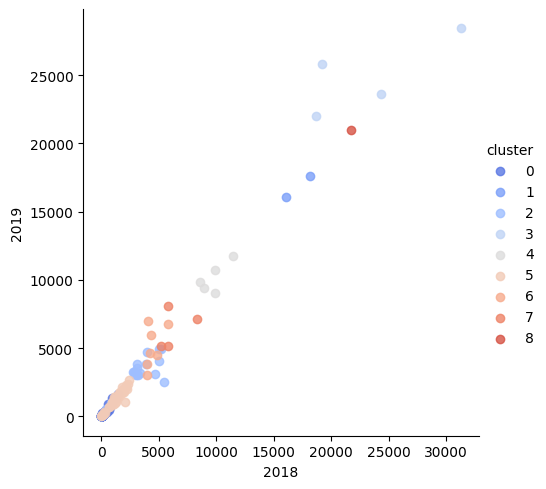

In [120]:
import seaborn as sns
sns.lmplot(x='2018',y='2019',data=df,hue='cluster',palette='coolwarm',height=5,aspect=1,fit_reg=False)



In [121]:
kmeans.inertia_

524847558.09707963

In [122]:
kmeans.score

<bound method _BaseKMeans.score of KMeans(n_clusters=9)>

In [123]:
df

,state/ut,crime head,2018,2019,2020,2021,cluster
0,Andhra Pradesh,3,935,870,853,956,5
1,ArunachalPradesh,3,62,60,45,49,0
2,Assam,3,1241,1235,1131,1192,5
3,Bihar,3,2934,3138,3150,2799,2
4,Chhattisgarh,3,917,913,972,1007,5
...,...,...,...,...,...,...,...
140,Telangana,2,3122,3814,3820,6046,2
141,Tripura,2,176,231,148,152,0
142,Uttar Pradesh,2,31282,28417,19019,23044,3
143,Uttarakhand,2,942,925,573,963,0


In [125]:
cust=[[7,871,1002,946,1016]]
kmeans.predict(cust)[0]
#,935,1049,1070,1257,1188,1362,1442,1341

d:\Coding\CRP\main\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


5

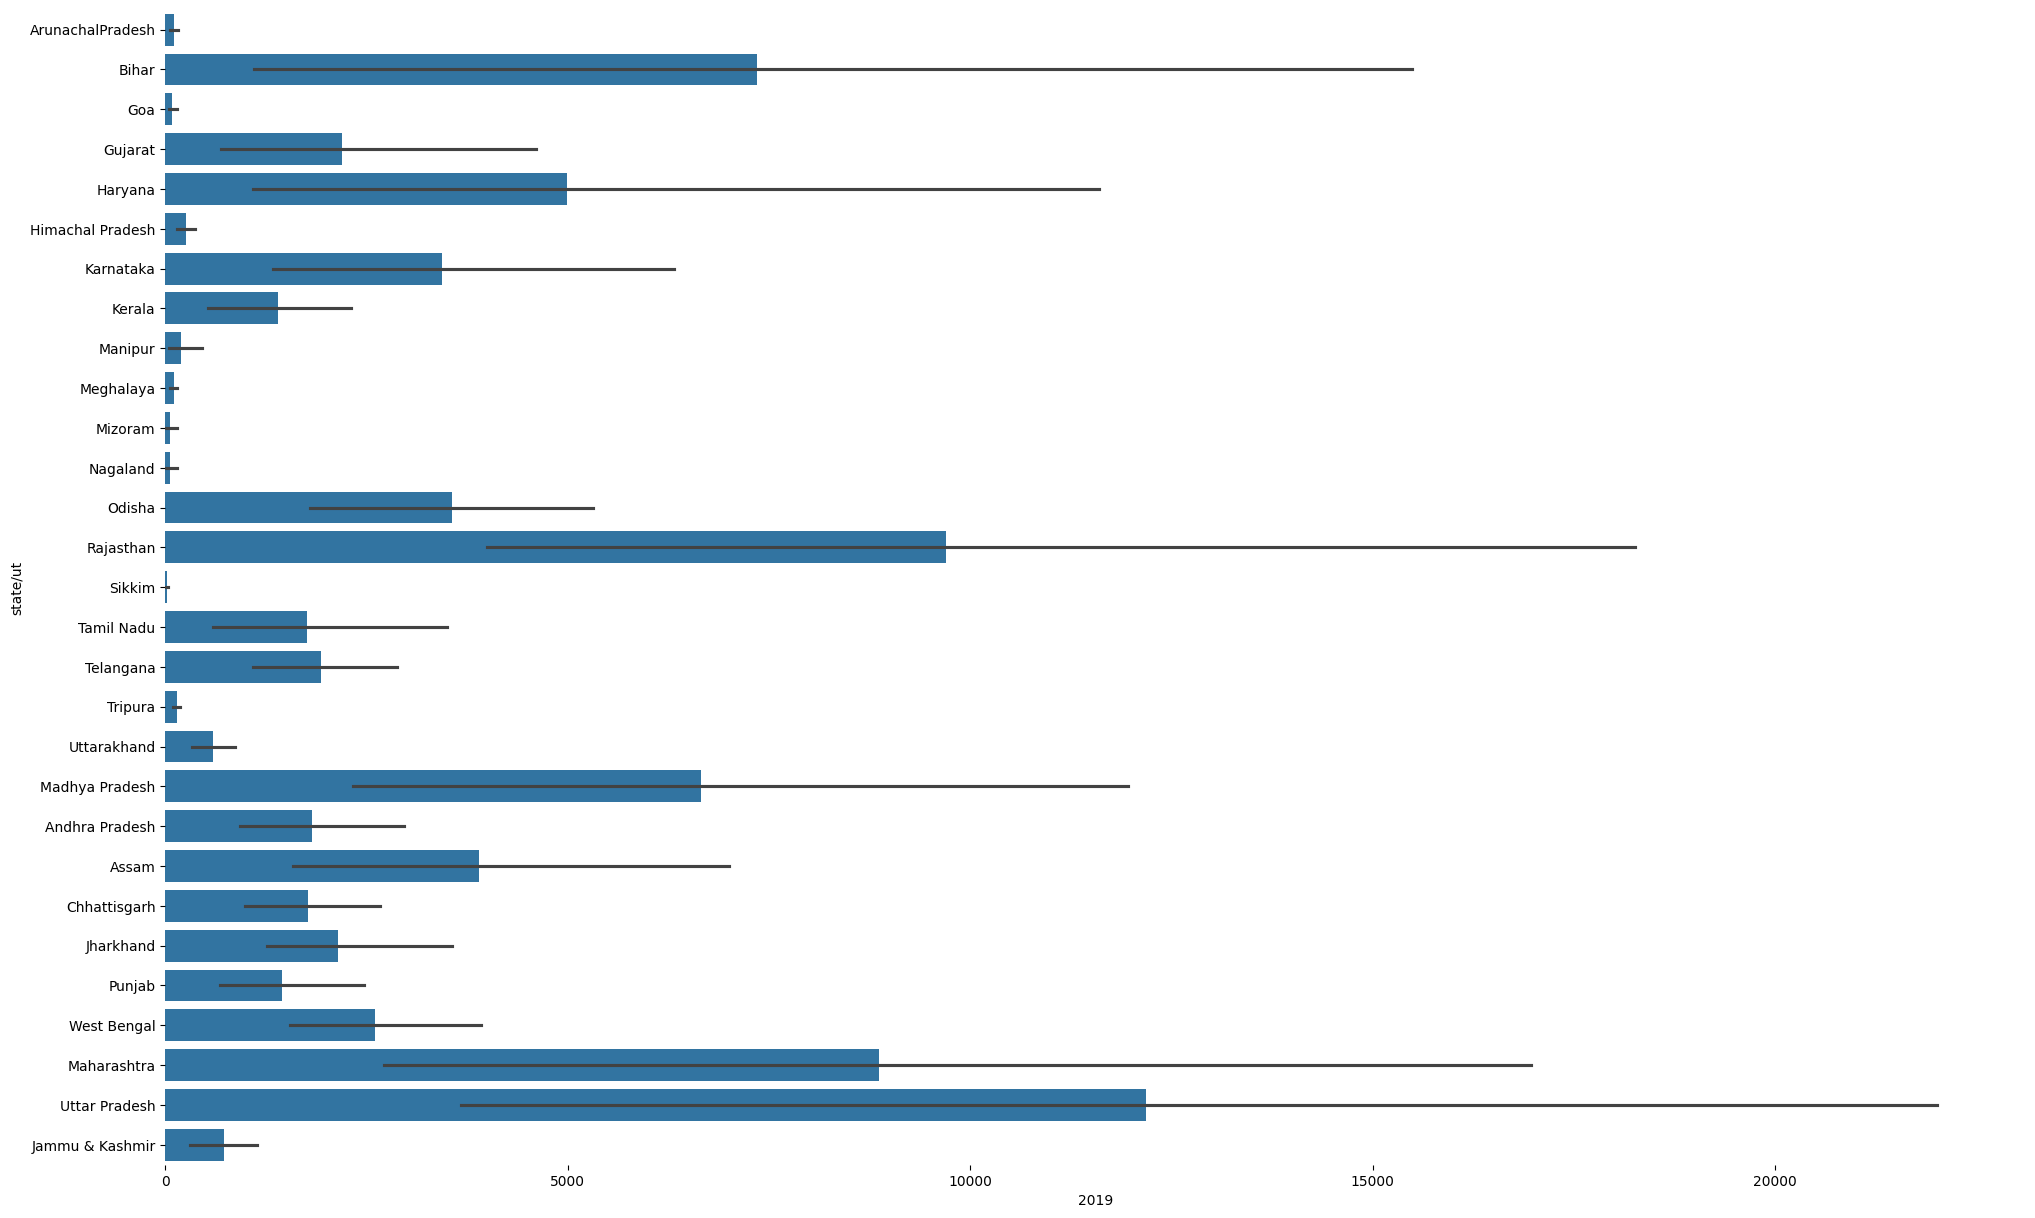

In [126]:
f,ax=plt.subplots(figsize=(24,15))
stats = df.sort_values(["cluster","state/ut"],ascending=True)
sns.set_color_codes("pastel")
sns.barplot(y="state/ut",x="2019",data=stats)
sns.despine(left=True,bottom=True)

In [128]:
x=df.iloc[:,1:14]
y=df.iloc[:,df.columns=="cluster"]

In [129]:
print(x.head())
y.head()

   crime head  2018  2019  2020  2021  cluster
0           3   935   870   853   956        5
1           3    62    60    45    49        0
2           3  1241  1235  1131  1192        5
3           3  2934  3138  3150  2799        2
4           3   917   913   972  1007        5


,cluster
0,5
1,0
2,5
3,2
4,5


In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [138]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score,classification_report
acc1=accuracy_score(y_pred,y_test)
print(acc1)
clf=classification_report(y_pred,y_test)
print(clf)

[5 0 0 0 0 2 5 5 5 6 0 0 1 5 2 0 0 4 5 0 2 5 0 5 4 5 6 4 2]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         2

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



d:\Coding\CRP\main\venv\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [132]:
x_test

,crime head,2018,2019,2020,2021,cluster
7,3,1104,1137,1143,1112,5
24,3,786,839,114,122,0
27,3,211,199,178,192,0
66,0,194,186,232,192,0
73,0,34,39,50,52,0
98,1,3027,3080,2253,2879,2
62,0,1311,1050,1187,1020,5
22,3,12,17,1661,1686,5
111,1,1810,2127,2056,2760,5
26,3,4018,3806,160,208,6


In [133]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
predic2=lg.predict(x_test)
acc2=accuracy_score(predic2,y_test)
print(acc2)
clf2=classification_report(predic2,y_test)
print(clf2)

0.3103448275862069
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         0
           5       0.78      0.44      0.56        16
           6       1.00      0.67      0.80         3
           8       0.00      0.00      0.00         1

    accuracy                           0.31        29
   macro avg       0.22      0.14      0.17        29
weighted avg       0.53      0.31      0.39        29



d:\Coding\CRP\main\venv\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Coding\CRP\main\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Coding\CRP\main\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to

In [134]:
from sklearn import svm
sv=svm.LinearSVC()
sv.fit(x_train,y_train)
predic3=sv.predict(x_test)
acc3=accuracy_score(predic3,y_test)
print(acc3)
clf3=classification_report(predic3,y_test)
print(clf3)

0.3448275862068966
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         0
           5       0.22      0.50      0.31         4
           6       0.50      1.00      0.67         1
           7       0.00      0.00      0.00         5

    accuracy                           0.34        29
   macro avg       0.18      0.30      0.22        29
weighted avg       0.24      0.34      0.28        29



d:\Coding\CRP\main\venv\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Coding\CRP\main\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Coding\CRP\main\venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Coding\CRP\main\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Coding\C

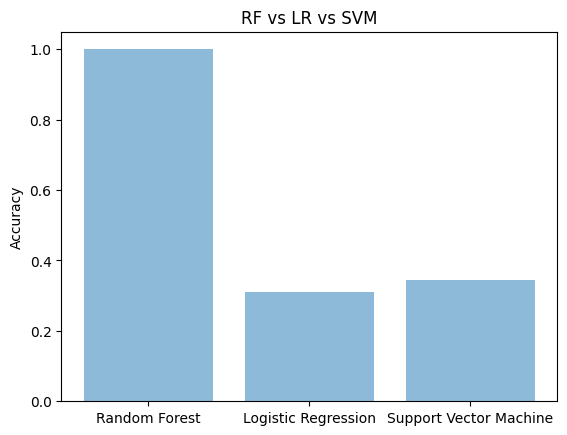

In [140]:
import matplotlib.pyplot as plt; plt.rcdefaults()
objects=('Random Forest','Logistic Regression','Support Vector Machine')
y_pos = np.arange(len(objects))
performance=[acc1,acc2,acc3]
plt.bar(y_pos,performance,align='center',alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Accuracy')
plt.title('RF vs LR vs SVM')
plt.show()

In [ ]:
df["cluster"]

In [ ]:
import pickle
pickle.dump(random_forest,open('model.pkl','wb'))